<a href="https://colab.research.google.com/github/Erika2397/NLP-aplicando-el-procesamiento-del-lenguaje-natural-para-el-analisis-de-sentimientos/blob/main/notebooks/aula_3/notebook_aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clase 1: Explorando y vectorizando datos textuales**

##**Conociendo los datos**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Erika2397/NLP-aplicando-el-procesamiento-del-lenguaje-natural-para-el-analisis-de-sentimientos/main/dataset_evaluaciones_traducido.csv')

In [3]:
df.head()

ID_evaluacion                                         evaluacion  \
0          81841  Este teléfono inteligente superó mis expectati...   
1          28031  ¡El olor es muy desagradable! Para aquellos qu...   
2          91332  Hice la compra que la tienda no entregó el pro...   
3         110045  Cumplió con mis expectativas, solo encontré la...   
4          36929  Realmente me gustó, solo pensé que era querer ...   

   calificacion sentimiento  
0             5    positivo  
1             2    negativo  
2             1    negativo  
3             4    positivo  
4             5    positivo

In [4]:
df.shape

(15501, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15501 entries, 0 to 15500
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_evaluacion  15501 non-null  int64 
 1   evaluacion     15493 non-null  object
 2   calificacion   15501 non-null  int64 
 3   sentimiento    15501 non-null  object
dtypes: int64(2), object(2)
memory usage: 484.5+ KB


In [6]:
df['evaluacion'] = df['evaluacion'].fillna('')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15501 entries, 0 to 15500
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_evaluacion  15501 non-null  int64 
 1   evaluacion     15501 non-null  object
 2   calificacion   15501 non-null  int64 
 3   sentimiento    15501 non-null  object
dtypes: int64(2), object(2)
memory usage: 484.5+ KB


In [8]:
df['sentimiento'].value_counts()

sentimiento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [9]:
print('positiva \n')

df.evaluacion[4]

positiva 



'Realmente me gustó, solo pensé que era querer la calidad de las fotos. Pensé que era mucho mejor.'

In [10]:
print('negativo \n')

df.evaluacion[2]

negativo 



'Hice la compra que la tienda no entregó el producto, la compra se realizó en la tarjeta de crédito y hasta ahora la tienda tampoco me devolvió el valor de la compra.'

##**Transformando textos en datos numéricos**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Compré un excelente producto", "Compré un pésimo producto"]

vectorizar = CountVectorizer(lowercase=False)
bag_of_words = vectorizar.fit_transform(texto)

In [12]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [13]:
matriz_dispersa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizar.get_feature_names_out())
matriz_dispersa

Compré  excelente  producto  pésimo  un
0       1          1         1       0   1
1       1          0         1       1   1

In [14]:
vectorizador = CountVectorizer(lowercase=False)
bag_of_words = vectorizador.fit_transform(df.evaluacion)
print(bag_of_words.shape)

(15501, 18930)


In [15]:
vectorizador = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizador.fit_transform(df.evaluacion)
print(bag_of_words.shape)

(15501, 50)


In [16]:
matriz_dispersa_evaluaciones = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizador.get_feature_names_out())
matriz_dispersa_evaluaciones

El  La  Me  Muy  No  al  antes  bien  calidad  como  ...  que  \
0       0   0   0    0   0   0      0     0        0     0  ...    0   
1       1   0   0    0   0   0      0     0        0     0  ...    1   
2       0   0   0    0   0   0      0     0        0     0  ...    1   
3       0   0   0    0   0   0      0     0        0     0  ...    1   
4       0   0   0    0   0   0      0     0        1     0  ...    2   
...    ..  ..  ..  ...  ..  ..    ...   ...      ...   ...  ...  ...   
15496   0   0   0    0   0   0      0     0        0     0  ...    0   
15497   1   0   0    0   0   0      0     0        0     0  ...    1   
15498   0   0   0    1   0   0      0     1        0     0  ...    0   
15499   0   0   0    1   0   1      1     0        0     0  ...    1   
15500   0   0   0    0   0   0      0     0        0     0  ...    1   

       recomiendo  se  sin  solo  tiempo  tiene  un  una  ya  
0               1   0    0     0       0      0   0    0   0  
1               1   0    0     0       0      0   0    0   0  
2               0   1    0     0       0      0   0    0   0  
3               0   0    0     1       0      0   0    0   0  
4               0   0    0     1       0      0   0    0   0  
...           ...  ..  ...   ...     ...    ...  ..  ...  ..  
15496           0   0    0     0       0      0   0    0   0  
15497           0   0    0     0       0      1   0    0   0  
15498           0   0    0     0       0      0   0    1   0  
15499           0   0    0     0       0      0   0    0   0  
15500           0   0    0     0       0      0   0    0   0  

[15501 rows x 50 columns]

##**Clasificando los sentimientos**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['sentimiento'], random_state=4978)

In [18]:
from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression()
regresion_logistica.fit(X_train, y_train)
acuracia = regresion_logistica.score(X_test, y_test)
print(acuracia)

0.8175954592363261


#**Clase 2: Explorando la frecuencia y el sentimiento de las palabras**

##**Visualizando las palabras más frecuentes en las evaluaciones**

In [19]:
from wordcloud import WordCloud

In [20]:
todas_palabras = [texto for texto in df.evaluacion]

In [21]:
todas_palabras

['Este teléfono inteligente superó mis expectativas, recomiendo',
 '¡El olor es muy desagradable! Para aquellos que están molestos, no lo recomiendo.',
 'Hice la compra que la tienda no entregó el producto, la compra se realizó en la tarjeta de crédito y hasta ahora la tienda tampoco me devolvió el valor de la compra.',
 'Cumplió con mis expectativas, solo encontré la luz mala, pero nada que dificulte la función.',
 'Realmente me gustó, solo pensé que era querer la calidad de las fotos. Pensé que era mucho mejor.',
 'Compré el producto y no había entrega, ¡no fue genial!',
 'El producto puede incluso ser bueno, pero solo puedo evaluarlo después de que se haga el intercambio para que yo lo use, porque estoy esperando que el intercambio se haga lo que recibí salió roto.',
 'Ya envié dos quejas, pero no obtuve respuesta. Recibí el producto roto y quiero otro. Estoy esperando saber qué hacer. Att. Carmen',
 'No recibí el producto, porque no ha cumplido con el compromiso de entregar hasta e

In [22]:
todas_palabras = ' '.join([texto for texto in df.evaluacion])

In [23]:
todas_palabras

'Este teléfono inteligente superó mis expectativas, recomiendo ¡El olor es muy desagradable! Para aquellos que están molestos, no lo recomiendo. Hice la compra que la tienda no entregó el producto, la compra se realizó en la tarjeta de crédito y hasta ahora la tienda tampoco me devolvió el valor de la compra. Cumplió con mis expectativas, solo encontré la luz mala, pero nada que dificulte la función. Realmente me gustó, solo pensé que era querer la calidad de las fotos. Pensé que era mucho mejor. Compré el producto y no había entrega, ¡no fue genial! El producto puede incluso ser bueno, pero solo puedo evaluarlo después de que se haga el intercambio para que yo lo use, porque estoy esperando que el intercambio se haga lo que recibí salió roto. Ya envié dos quejas, pero no obtuve respuesta. Recibí el producto roto y quiero otro. Estoy esperando saber qué hacer. Att. Carmen No recibí el producto, porque no ha cumplido con el compromiso de entregar hasta este día 23/05/18. Logística pesim

In [24]:
nube_palabras = WordCloud().generate(todas_palabras)

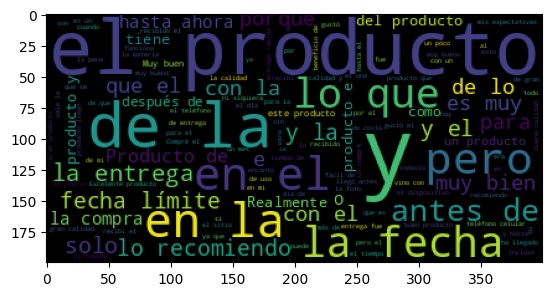

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nube_palabras)
plt.show()

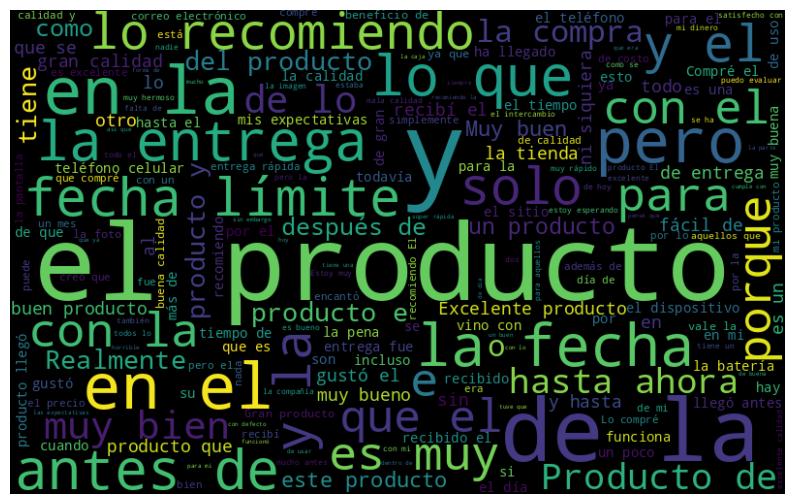

In [26]:
nube_palabras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palabras)
plt.figure(figsize=(10,7))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

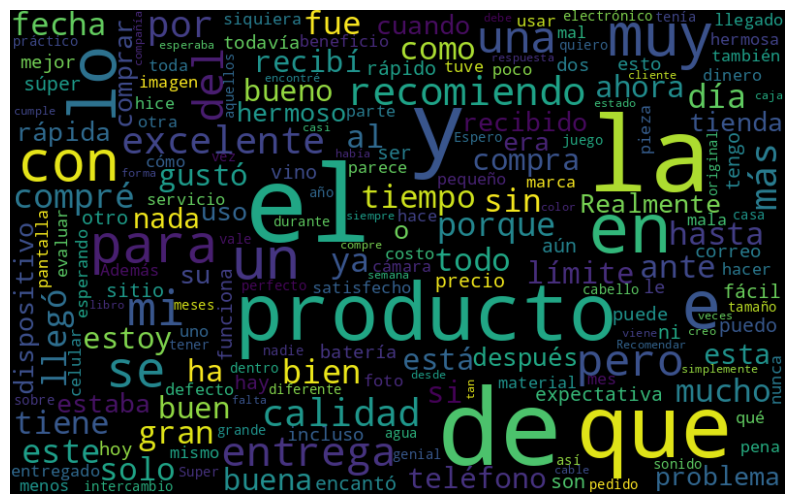

In [27]:
nube_palabras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palabras)
plt.figure(figsize=(10,7))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

##**Analizando palabras por sentimiento**

In [28]:
def nube_palabras(texto, columna_texto, sentimiento):
  texto_sentimiento = texto.query(f"sentimiento == '{sentimiento}'")[columna_texto]
  texto_unido = ' '.join(texto_sentimiento)
  nube_palabras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.imshow(nube_palabras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

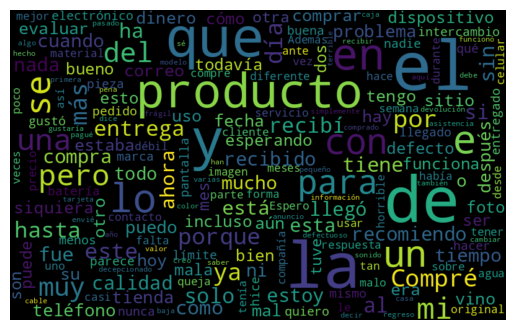

In [29]:
nube_palabras(df, 'evaluacion', 'negativo')

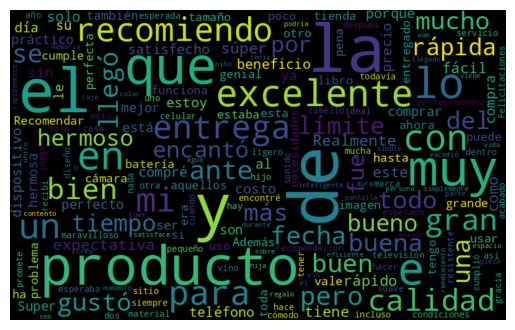

In [30]:
nube_palabras(df, 'evaluacion', 'positivo')

##**Dividiendo el texto en unidades menores**

In [31]:
todas_palabras

'Este teléfono inteligente superó mis expectativas, recomiendo ¡El olor es muy desagradable! Para aquellos que están molestos, no lo recomiendo. Hice la compra que la tienda no entregó el producto, la compra se realizó en la tarjeta de crédito y hasta ahora la tienda tampoco me devolvió el valor de la compra. Cumplió con mis expectativas, solo encontré la luz mala, pero nada que dificulte la función. Realmente me gustó, solo pensé que era querer la calidad de las fotos. Pensé que era mucho mejor. Compré el producto y no había entrega, ¡no fue genial! El producto puede incluso ser bueno, pero solo puedo evaluarlo después de que se haga el intercambio para que yo lo use, porque estoy esperando que el intercambio se haga lo que recibí salió roto. Ya envié dos quejas, pero no obtuve respuesta. Recibí el producto roto y quiero otro. Estoy esperando saber qué hacer. Att. Carmen No recibí el producto, porque no ha cumplido con el compromiso de entregar hasta este día 23/05/18. Logística pesim

In [32]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [33]:
frase = ["un excelente producto", "un mal producto"]
frecuencia = nltk.FreqDist(frase)
frecuencia

FreqDist({'un excelente producto': 1, 'un mal producto': 1})

In [34]:
from nltk import tokenize

frase = 'El producto es excelente y la entrega fue rápida'

token_espacio = tokenize.WhitespaceTokenizer()
token_frase = token_espacio.tokenize(frase)
print(token_frase)

['El', 'producto', 'es', 'excelente', 'y', 'la', 'entrega', 'fue', 'rápida']


##**Analizando la frecuencia de las palabras**

In [35]:
token_frase = token_espacio.tokenize(todas_palabras)
token_frase

['Este',
 'teléfono',
 'inteligente',
 'superó',
 'mis',
 'expectativas,',
 'recomiendo',
 '¡El',
 'olor',
 'es',
 'muy',
 'desagradable!',
 'Para',
 'aquellos',
 'que',
 'están',
 'molestos,',
 'no',
 'lo',
 'recomiendo.',
 'Hice',
 'la',
 'compra',
 'que',
 'la',
 'tienda',
 'no',
 'entregó',
 'el',
 'producto,',
 'la',
 'compra',
 'se',
 'realizó',
 'en',
 'la',
 'tarjeta',
 'de',
 'crédito',
 'y',
 'hasta',
 'ahora',
 'la',
 'tienda',
 'tampoco',
 'me',
 'devolvió',
 'el',
 'valor',
 'de',
 'la',
 'compra.',
 'Cumplió',
 'con',
 'mis',
 'expectativas,',
 'solo',
 'encontré',
 'la',
 'luz',
 'mala,',
 'pero',
 'nada',
 'que',
 'dificulte',
 'la',
 'función.',
 'Realmente',
 'me',
 'gustó,',
 'solo',
 'pensé',
 'que',
 'era',
 'querer',
 'la',
 'calidad',
 'de',
 'las',
 'fotos.',
 'Pensé',
 'que',
 'era',
 'mucho',
 'mejor.',
 'Compré',
 'el',
 'producto',
 'y',
 'no',
 'había',
 'entrega,',
 '¡no',
 'fue',
 'genial!',
 'El',
 'producto',
 'puede',
 'incluso',
 'ser',
 'bueno,',
 'p

In [36]:
frecuencia = nltk.FreqDist(token_frase)
frecuencia

FreqDist({'de': 16142, 'el': 13476, 'la': 12513, 'y': 11790, 'que': 10667, 'no': 8357, 'en': 6084, 'es': 5430, 'producto': 5156, 'un': 4323, ...})

In [37]:
df_frecuencia = pd.DataFrame({'Palabra': list(frecuencia.keys()),
                              'Frecuencia': list(frecuencia.values())})

In [38]:
df_frecuencia.head()

Palabra  Frecuencia
0         Este         167
1     teléfono         713
2  inteligente          79
3       superó          29
4          mis         706

In [39]:
df_frecuencia.nlargest(columns='Frecuencia', n=10)

Palabra  Frecuencia
31         de       16142
25         el       13476
21         la       12513
33          y       11790
14        que       10667
17         no        8357
29         en        6084
9          es        5430
63   producto        5156
172        un        4323

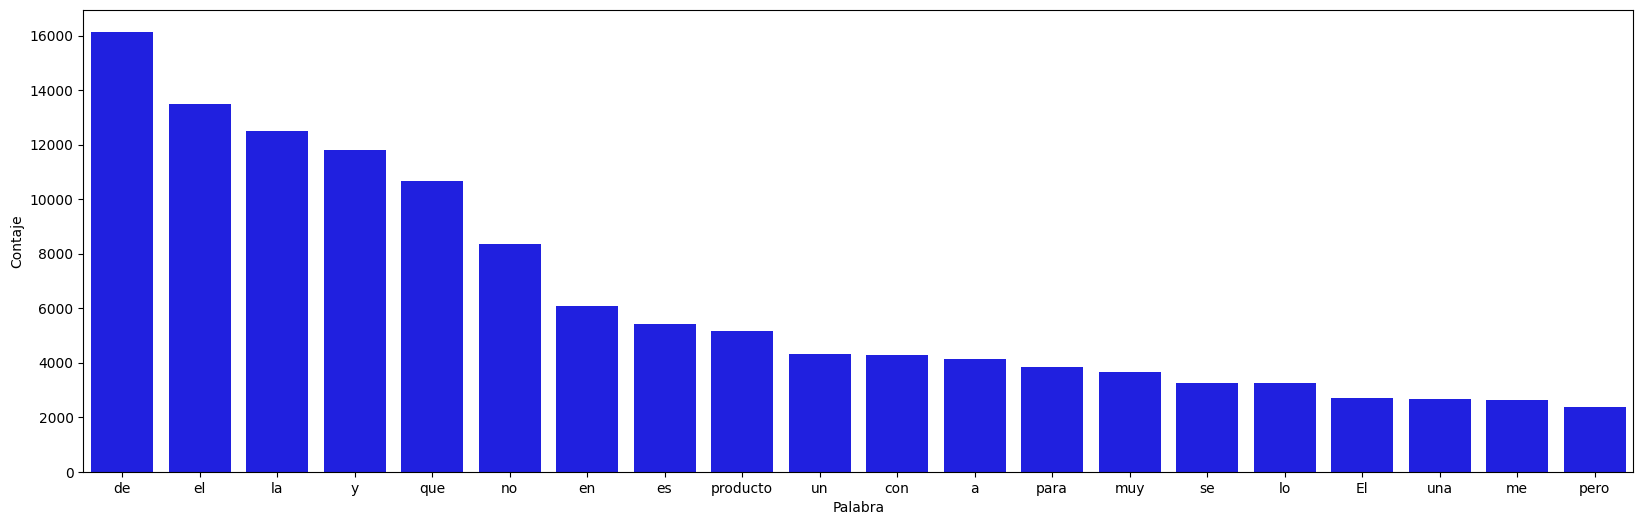

In [40]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frecuencia.nlargest(columns='Frecuencia', n=20), x = 'Palabra', y = 'Frecuencia', color='blue')
ax.set(ylabel='Contaje')
plt.show()

#**Clase 3: Limpiando y normalizando datos textuales**

##**Eliminando palabras vacías**

In [5]:
def clasificar_texto(texto, columna_texto, columna_clasificacion):
    vectorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizar.fit_transform(texto[columna_texto])
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, texto[columna_clasificacion], random_state=4978)
    regresion_logistica = LogisticRegression()
    regresion_logistica.fit(X_train, y_train)
    precision = regresion_logistica.score(X_test, y_test)
    return print(f"Exactitud del modelo con '{columna_texto}': {precision * 100:.2f}%")

In [6]:
def grafico_frecuencia(texto, columna_texto, cantidad):
    todas_palabras = ' '.join([texto for texto in texto[columna_texto]])
    token_espacio = tokenize.WhitespaceTokenizer()
    frecuencia = nltk.FreqDist(token_espacio.tokenize(todas_palabras))
    df_frecuencia = pd.DataFrame({"Palabra": list(frecuencia.keys()),
    "Frecuencia": list(frecuencia.values())})
    df_frecuencia = df_frecuencia.nlargest(columns="Frecuencia", n=cantidad)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frecuencia, x="Palabra", y="Frecuencia", color='gray')
    ax.set(ylabel="Contaje")
    plt.show()

##**Eliminando puntuaciones**

##**Removiendo acentuacion**

In [7]:
#! pip install unidecode

##**Uniformizando el texto**

#**Clase 4: Utilizando otras técnicas de procesamiento de texto**

##**Simplificando las palabras**

##**Determinando la importancia de las palabras**

##**Capturando contextos**

##**Explorando la cantidad de características en la vectorización**

In [8]:
# tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
# vector_tfidf = tfidf.fit_transform(df['tratamiento_5'])
# x_train, x_test, y_train, y_test = train_test_split(vector_tfidf, df['sentimiento'], random_state=4978)
# regresion_logistica.fit(X_train, y_train)
# acuracia_tfidf_ngrams = regresion_logistica.score(X_test, y_test)
# print(f'Acurácia del modelo con todas las features y ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

⚠️ Ejecutar nuevamente el código de `tfidf_1000` antes de ejecutar la celda siguiente:

#**Clase 5: Probando el modelo de clasificación**

##**Guardando y cargando el modelo**

##**Creando una función para procesar nuevos datos**

##**Clasificando nuevas evaluaciones**

In [9]:
# nuevas_evaluaciones_para_predecir
nuevas_evaluaciones = [
                 "¡La entrega se retrasó mucho! Estoy decepcionado con la compra",
                 "¡Horrible! El producto llegó dañado y ahora estoy tratando de hacer la devolución.",
                '''rastreando el paquete encontré que no lo recibiría pues en la fecha prevista estaba siendo entregado en otra ciudad.
                  mas al final, todo salió bien y recibí el producto. Producto de excelente calidad, satisfaciendo mis necesidades y por
                  un precio súper económico. ¡Lo recomiendo!''']